In [ ]:

import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:

IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


228818944/228813984 [==============================] - 3s 0us/step


In [ ]:
data_dir

'./datasets/flower_photos'

In [ ]:
import pathlib

data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [ ]:
data_dir.glob("*/*.jpg")

<generator object Path.glob at 0x7f71ea9987d0>

In [ ]:
flowers=list(data_dir.glob("*/*.jpg"))
len(flowers)

3670

In [ ]:
roses=list(data_dir.glob('roses/*'))
roses[:3]

[PosixPath('datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'),
 PosixPath('datasets/flower_photos/roses/14993880427_95d0f27257.jpg'),
 PosixPath('datasets/flower_photos/roses/3231873181_faf2da6382.jpg')]

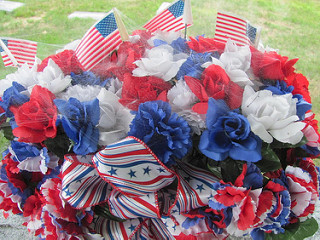

In [ ]:
Image.open(str(roses[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/14221192676_eb8c89a7d6_n.jpg'

In [ ]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape

(240, 320, 3)

In [ ]:
cv2.resize(img,(224,224)).shape

(224, 224, 3)

In [ ]:
X=[]
y=[]

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(224,224))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])


In [ ]:
X=np.array(X)
y=np.array(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
X[0].shape

(224, 224, 3)

In [ ]:
x0_resized = cv2.resize(X[0], IMAGE_SHAPE)
x1_resized = cv2.resize(X[1], IMAGE_SHAPE)
x2_resized = cv2.resize(X[2], IMAGE_SHAPE)

In [ ]:

predicted = classifier.predict(np.array([x0_resized, x1_resized, x2_resized]))
predicted = np.argmax(predicted, axis=1)
predicted


array([722, 795, 795])

# Give our flowers images to model

In [ ]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)


In [ ]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 71s 781ms/step - loss: 0.8481 - acc: 0.6777
Epoch 2/5
86/86 [==============================] - 67s 779ms/step - loss: 0.4230 - acc: 0.8594
Epoch 3/5
86/86 [==============================] - 67s 776ms/step - loss: 0.3263 - acc: 0.8935
Epoch 4/5
86/86 [==============================] - 67s 775ms/step - loss: 0.2788 - acc: 0.9128
Epoch 5/5
86/86 [==============================] - 67s 775ms/step - loss: 0.2413 - acc: 0.9248


In [ ]:

model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 23s 770ms/step - loss: 0.3775 - acc: 0.8736


[0.3775263726711273, 0.8736383318901062]